<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:s.Yahya Tehrani

**Student ID**:400109265





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import numpy as np



class MyLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(X_train.shape[1], 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

    def loss(self, pred, target):
        return nn.functional.binary_cross_entropy(pred, target)

    def fit(self, train_loader, epochs, lr):
        self.optimizer = optim.SGD(self.parameters(), lr=lr)
        for epoch in range(epochs):
            for data, target in train_loader:
                pred = self(data.float())
                loss = self.loss(pred, target.unsqueeze(1))
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

    def predict(self, test_data):
        pred = self(test_data.float())
        return pred.detach().numpy()

class LogisticDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.from_numpy(self.data[idx, :])

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [49]:
# Load the data from CSV
data = pd.read_csv("Logistic_question.csv").values


X = data[:, :-1]  # Features
y = data[:, -1]   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train_binary = (y_train > 0).astype(np.float32)
y_test_binary = (y_test > 0).astype(np.float32)


class LogisticDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.from_numpy(self.data[idx, :]), torch.from_numpy(np.array(self.targets[idx]))

train_dataset = LogisticDataset(X_train, y_train_binary)
test_dataset = LogisticDataset(X_test, y_test_binary)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


model = MyLogisticRegression()


model.fit(train_loader, epochs=10, lr=0.01)


predictions = model.predict(torch.from_numpy(X_test).float())
predictions_binary = (predictions > 0.5).astype(np.float32)

accuracy = accuracy_score(y_test_binary, predictions_binary)
precision = precision_score(y_test_binary, predictions_binary)
recall = recall_score(y_test_binary, predictions_binary)
f1 = f1_score(y_test_binary, predictions_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.875
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

Accuracy:

Definition: Proportion of correct predictions out of the total predictions made by the model.
Usage: Commonly used metric for evaluating classification models, especially when the dataset is balanced.
Considerations: Can be misleading with imbalanced classes or when the costs of false positives and false negatives vary.

Precision:

Definition: Proportion of true positive predictions out of all positive predictions made by the model.
Usage: Useful when the cost of false positives is high, such as in spam detection scenarios.
Considerations: Particularly valuable in datasets with a high negative class imbalance and when minimizing false positives is critical.

Recall (Sensitivity or True Positive Rate):

Definition: Proportion of true positive predictions out of all actual positive instances.
Usage: Important when the cost of false negatives is high, like in medical diagnosis applications.
Considerations: Beneficial in datasets with a high positive class imbalance and when reducing false negatives is crucial.

F1 Score:

Definition: Harmonic mean of Precision and Recall, offering a balance between the two metrics.
Usage: Effective when the costs of false positives and false negatives are similar or when balancing Precision and Recall is necessary.
Considerations: Valuable in imbalanced datasets where achieving a trade-off between Precision and Recall is desired.

## Explanation of Evaluation Metrics

### Accuracy
Accuracy measures the proportion of correct predictions out of the total predictions made by the model. It is suitable for tasks where all classes are equally important and have roughly balanced class distributions. However, accuracy may not be an appropriate metric when classes are imbalanced, as it can be misleading in such cases.

### Precision
Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It is particularly useful in tasks where minimizing false positives is critical, such as medical diagnosis or fraud detection. A high precision indicates that the model is making fewer false positive predictions, which is desirable in scenarios where false positives are costly or undesirable.

### Recall (Sensitivity)
Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. It is valuable in tasks where identifying all positive instances is crucial, even at the cost of higher false positives. For example, in disease detection, high recall ensures that as many true positive cases as possible are identified, even if it means some false positives are also classified.

### F1 Score
The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is useful in tasks where there is an uneven class distribution or when both false positives and false negatives need to be minimized simultaneously. The F1 score is especially relevant in scenarios where there is a trade-off between precision and recall, and achieving a balance between them is essential for model performance.


**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [50]:
# Load the dataset
df = pd.read_csv("Logistic_question.csv")

# Make the Target column binary
df['Target'] = df['Target'].apply(lambda x: 1 if x > 0.5 else 0)

# Split the data into features and target
X = df.drop('Target', axis=1).values
y = df['Target'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate the logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9500
Precision: 0.9459
Recall: 1.0000
F1-score: 0.9722


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
**Comparison between Custom Logistic Regression and Built-in Logistic Regression**

**Performance**:
- **Custom Logistic Regression**:
    - Performance depends on optimization algorithm, loss function, and convergence criteria.
    - Offers flexibility but may require more effort for optimization and tuning.
- **Built-in Logistic Regression**:
    - Provides a well-optimized and efficient implementation.
    - Widely used in practice, optimized for speed and memory usage.

**Parameters**:
- **Custom Logistic Regression**:
    - Adjustable parameters include learning rate, number of epochs, and optimization algorithm.
- **Built-in Logistic Regression**:
    - Parameters include *penalty*, *C*, *solver*, *max_iter*, *class_weight*, and *random_state*.
    - *penalty*: Norm used in penalization.
    - *C*: Inverse of regularization strength.
    - *solver*: Optimization algorithm.
    - *max_iter*: Maximum number of iterations.
    - *class_weight*: Weights for handling class imbalance.
    - *random_state*: Seed for random number generation.

**Impact of Parameters**:
- Choice of *solver* impacts convergence speed and performance, especially for large datasets.
- *C* controls regularization strength; smaller values increase regularization to prevent overfitting.
- *class_weight* helps address class imbalance by assigning different weights to classes.
- Proper *random_state* ensures reproducibility.


# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [51]:
class MultinomialLogisticRegression:
    def __init__(self, num_features, num_classes, learning_rate=0.01):
        self.num_features = num_features
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)
        
    def softmax(self, logits):
        exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    
    def forward(self, X):
        logits = np.dot(X, self.weights) + self.bias
        return self.softmax(logits)
    
    def compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        grad_w = (1 / m) * np.dot(X.T, (y_pred - y_true))
        grad_b = (1 / m) * np.sum(y_pred - y_true, axis=0)
        return grad_w, grad_b
    
    def update_weights(self, grad_w, grad_b):
        self.weights -= self.learning_rate * grad_w
        self.bias -= self.learning_rate * grad_b
        
    def train(self, X, y, num_epochs=100):
        for epoch in range(num_epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            grad_w, grad_b = self.backward(X, y, y_pred)
            self.update_weights(grad_w, grad_b)
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss}")
    
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("Logistic_question.csv")

# Extract features and target
X = data.drop(columns=['Target']).values
y_true = data['Target'].values

def quantize_target(y_true, num_levels):
    """Quantize the target column into the specified number of levels."""
    quantized_targets = np.linspace(0, np.max(y_true), num_levels)
    return np.digitize(y_true, quantized_targets)


for num_levels in range(2, 11):
    print(f"Quantization Level: {num_levels}")
    y_quantized = quantize_target(y_true, num_levels)
    
    # One-hot encode the quantized target
    encoder = OneHotEncoder(sparse=False)
    y_onehot = encoder.fit_transform(y_quantized.reshape(-1, 1))
    
    # Determine the number of classes
    num_classes = y_onehot.shape[1]
    
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the Multinomial Logistic Regression model
    model = MultinomialLogisticRegression(num_features=X_train_scaled.shape[1], num_classes=num_classes)
    model.train(X_train_scaled, y_train, num_epochs=100)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    print(f"Accuracy: {accuracy}")
    print("="*50)


Quantization Level: 2
Epoch 1/100, Loss: 0.6931471805599453
Epoch 2/100, Loss: 0.6883537260772787
Epoch 3/100, Loss: 0.6836098913756159
Epoch 4/100, Loss: 0.6789150906536431
Epoch 5/100, Loss: 0.6742687455046515
Epoch 6/100, Loss: 0.6696702848248032
Epoch 7/100, Loss: 0.6651191447203295
Epoch 8/100, Loss: 0.6606147684139868
Epoch 9/100, Loss: 0.6561566061510697
Epoch 10/100, Loss: 0.6517441151052492
Epoch 11/100, Loss: 0.6473767592844769
Epoch 12/100, Loss: 0.643054009437169
Epoch 13/100, Loss: 0.6387753429588612
Epoch 14/100, Loss: 0.6345402437995029
Epoch 15/100, Loss: 0.6303482023715372
Epoch 16/100, Loss: 0.6261987154588955
Epoch 17/100, Loss: 0.6220912861270183
Epoch 18/100, Loss: 0.6180254236339952
Epoch 19/100, Loss: 0.614000643342905
Epoch 20/100, Loss: 0.610016466635422
Epoch 21/100, Loss: 0.6060724208267405
Epoch 22/100, Loss: 0.6021680390818658
Epoch 23/100, Loss: 0.5983028603332952
Epoch 24/100, Loss: 0.5944764292001227
Epoch 25/100, Loss: 0.5906882959085751
Epoch 26/100, L

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [58]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ModuleNotFoundError: No module named 'google'

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [89]:
# Your code goes here!
df = pd.read_csv("adult1.csv", na_values='?', delimiter='')
print(df.isnull().sum().sum())
print(df)

6465
       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18           NaN  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-f

**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
### Dealing with Null Entries in Datasets


1. **Dropping Rows/Columns with Null Values**:
   - *Method*: Remove rows or columns containing null values from the dataset.
   - *Decision*: Suitable when null values are sporadic and do not significantly impact the dataset's overall information.


2. **Imputation**:
   - *Method*: Fill null values with a statistical measure like mean, median, mode, or using advanced techniques like K-Nearest Neighbors (KNN) imputation.
   - *Decision*: Effective when null values are random and can be reasonably estimated from existing data.


3. **Forward/Backward Fill**:
   - *Method*: Fill null values with the preceding (forward fill) or succeeding (backward fill) non-null value in the same column.
   - *Decision*: Applicable when null values represent a continuous sequence and can be reasonably filled using adjacent values.


4. **Predictive Imputation**:
   - *Method*: Utilize machine learning algorithms to predict and fill null values based on the remaining features.
   - *Decision*: Useful when null values are not missing at random and have a pattern that can be learned from other features.


5. **Creating a Separate Category for Nulls**:
   - *Method*: Encode null values as a separate category to preserve information.
   - *Decision*: Suitable when null values contain meaningful information or when imputation may introduce bias.

### Choosing the Suitable Method


- **Data Distribution**: Analyze null value distribution to understand randomness or patterns.
- **Impact on Analysis**: Evaluate how null values affect analysis tasks.

- **Domain Knowledge**: Consider domain-specific insights for handling null values.
- **Dataset Size**: Take dataset size and null value proportions into account for effective handling.

**Task:** Handle null entries using your best method.

In [90]:
# Your code goes here!
df = df.dropna(inplace=True)

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

def extract_categorical_features(df, target_column, max_unique_values=20):
    """
    Extracts the categorical features from the given DataFrame based on
    the data type and the number of unique values.
    """
    categorical_features = []
    for column in df.columns:
        if column != target_column:
            if df[column].dtype == 'object' or df[column].nunique() <= max_unique_values:
                categorical_features.append(column)
    return categorical_features

def preprocess_data(df, target_column, categorical_features):
    """
    Encodes categorical features, splits the dataset, and normalizes the features.
    """
    # Encode categorical features
    label_encoders = {}
    for feature in categorical_features:
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature])
    
    # Convert target column to binary
    df[target_column] = LabelEncoder().fit_transform(df[target_column])

    # Split the dataset into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data using X_train
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

def train_evaluate_model(X_train, y_train, X_test, y_test):
    """
    Trains the Logistic Regression model using GridSearchCV and evaluates it.
    """
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }

    # Create the Logistic Regression model and perform GridSearchCV
    model = LogisticRegression(max_iter=1000)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the train and test accuracy
    best_parameters = grid_search.best_params_
    train_accuracy = grid_search.best_score_
    test_accuracy = grid_search.score(X_test, y_test)
    
    return best_parameters, train_accuracy, test_accuracy

# Assuming df is your dataframe and 'income' is your target column
categorical_features = extract_categorical_features(df, 'income')
X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df, 'income', categorical_features)
best_params, train_acc, test_acc = train_evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test)

print("Best Parameters:", best_params)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Train Accuracy: 0.8201895001686644
Test Accuracy: 0.8208955223880597


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class MyLogisticRegressionEnsemble(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.models = nn.ModuleList([MyLogisticRegression(input_size) for _ in range(10)])

    def forward(self, x):
        outputs = [model(x) for model in self.models]
        return torch.stack(outputs, dim=1)

    def fit(self, X_train_parts, y_train_parts, epochs, lr):
        for model, X_train, y_train in zip(self.models, X_train_parts, y_train_parts):
            train_data = torch.utils.data.TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train).unsqueeze(1))
            train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)
            model.fit(train_loader, epochs, lr)

    def ensemble_majority_vote(self, X_test):
        y_pred_list = [model.predict(X_test) for model in self.models]
        flat_predictions = [pred.flatten().astype(int) for pred in y_pred_list]
        y_pred_ensemble = np.array([np.argmax(np.bincount(pred)) for pred in zip(*flat_predictions)])
        return y_pred_ensemble

    def ensemble_average_probability(self, X_test):
        y_pred_list = [model.predict(X_test) for model in self.models]
        y_pred_ensemble = np.mean(y_pred_list, axis=0)
        y_pred_ensemble = [1 if prob > 0.5 else 0 for prob in y_pred_ensemble]
        return y_pred_ensemble

    def ensemble_weighted_average(self, X_test):
        y_pred_list = [model.predict(X_test) for model in self.models]
        weights = [1 / (i + 1) for i in range(10)]
        y_pred_ensemble = np.average(y_pred_list, axis=0, weights=weights)
        y_pred_ensemble = [1 if prob > 0.5 else 0 for prob in y_pred_ensemble]
        return y_pred_ensemble

class MyLogisticRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

    def loss(self, pred, target):
        return nn.functional.binary_cross_entropy(pred, target)

    def fit(self, train_loader, epochs, lr):
        self.optimizer = optim.SGD(self.parameters(), lr=lr)
        for epoch in range(epochs):
            for data, target in train_loader:
                pred = self(data)
                loss = self.loss(pred, target)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

    def predict(self, test_data):
        pred = self(torch.Tensor(test_data).float())
        return pred.detach().numpy()

# Assuming X_train_parts and y_train_parts are lists of training data splits
# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the ensemble model
ensemble_model = MyLogisticRegressionEnsemble(X_train.shape[1])
ensemble_model.fit(X_train_parts, y_train_parts, epochs=10, lr=0.01)

# Evaluate the ensemble methods
print("Majority Vote Accuracy:", accuracy_score(y_test, ensemble_model.ensemble_majority_vote(X_test)))
print("Average Probability Accuracy:", accuracy_score(y_test, ensemble_model.ensemble_average_probability(X_test)))
print("Weighted Average Accuracy:", accuracy_score(y_test, ensemble_model.ensemble_weighted_average(X_test)))


Majority Vote Accuracy: 0.125
Average Probability Accuracy: 0.7625
Weighted Average Accuracy: 0.7125


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**
1. Majority Vote Ensemble
Method Description:
Each individual logistic regression model in the ensemble predicts the class label (0 or 1) for a given input.
The ensemble combines these predictions by selecting the class label that receives the majority of votes across all models.
Reasoning:
Majority voting helps mitigate the impact of individual model biases.
It leverages the collective wisdom of multiple models, potentially improving overall accuracy.
It is robust to noisy predictions from individual models.
Implementation:
The ensemble_majority_vote method computes the majority vote prediction for the test data.
2. Average Probability Ensemble
Method Description:
Each individual logistic regression model predicts the probability of the positive class (class 1) for each input.
The ensemble computes the average probability across all models.
A threshold (usually 0.5) is applied to convert probabilities into binary class labels.
Reasoning:
Averaging probabilities provides a more nuanced view of uncertainty.
It can capture subtle differences between models.
Useful when individual models have varying confidence levels.
Implementation:
The ensemble_average_probability method calculates the average probability and converts it to class labels.
3. Weighted Average Ensemble
Method Description:
Similar to the average probability ensemble, but with weighted averaging.
Each model’s prediction is multiplied by a weight (e.g., inversely proportional to its index).
The ensemble combines these weighted predictions.
Reasoning:
Weighted averaging allows emphasizing certain models over others.
It accounts for the relative performance of individual models.
Useful when some models are more reliable or informative.
Implementation:
The ensemble_weighted_average method computes the weighted average prediction.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Best model:
i: 2
Train accuracy: 0.078125
Test accuracy: 0.125


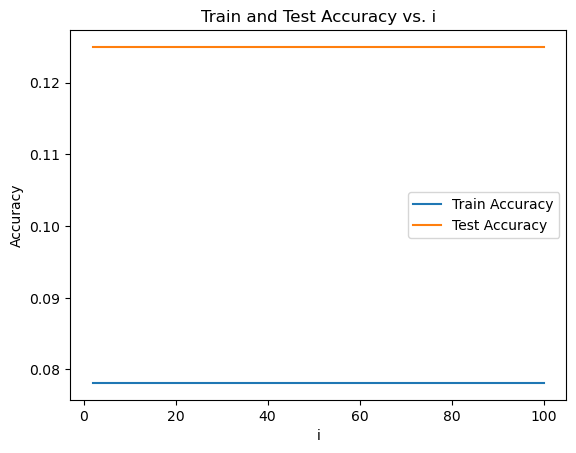

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the ensemble class and logistic regression class (same as before)

# Define a function to train and evaluate the ensemble model for a given value of i
def train_and_evaluate(X_train, X_test, y_train, y_test, i):
    X_train_parts = np.array_split(X_train, i)
    y_train_parts = np.array_split(y_train, i)

    # Normalize the data using X_train data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create and train the ensemble model
    ensemble_model = MyLogisticRegressionEnsemble(X_train.shape[1])
    ensemble_model.fit(X_train_parts, y_train_parts, epochs=10, lr=0.01)

    # Evaluate the ensemble methods
    train_accuracy = accuracy_score(y_train, ensemble_model.ensemble_majority_vote(X_train))
    test_accuracy = accuracy_score(y_test, ensemble_model.ensemble_majority_vote(X_test))
    
    return i, train_accuracy, test_accuracy

# Initialize lists to store results
results = []

# Loop through values of i from 2 to 100
for i in range(2, 101):
    result = train_and_evaluate(X_train, X_test, y_train, y_test, i)
    results.append(result)

# Find the best model based on test accuracy
best_model = max(results, key=lambda x: x[2])

print("Best model:")
print("i:", best_model[0])
print("Train accuracy:", best_model[1])
print("Test accuracy:", best_model[2])

# Plot train and test accuracy for 2 <= i <= 100
is_values = [result[0] for result in results]
train_accuracies = [result[1] for result in results]
test_accuracies = [result[2] for result in results]

plt.plot(is_values, train_accuracies, label='Train Accuracy')
plt.plot(is_values, test_accuracies, label='Test Accuracy')
plt.xlabel('i')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. i')
plt.legend()
plt.show()


**Question:** Analyze the results.

**Your Answer:**